# Mapping
This Notebook is for creating niche maps not part of the analysis pipeline.

In [1]:
import sys
from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy.ndimage.filters import gaussian_filter

sys.path.insert(1, str(Path.cwd() / 'utils'))
from constants import LEFT_BOUND, RIGHT_BOUND, TOP_BOUND, BOTTOM_BOUND
from plot import *  # noqa: E402

In [20]:
# https://www.uesleisutil.com.br/etopo1-plotting-etopo1-w-xarray-cartopy-using-jupyter-nb.html

data = xr.open_dataset(Path.cwd() / 'data' / 'etopo1.nc', engine='netcdf4')
print(data)

data = data.sel(
    x=slice(LEFT_BOUND, RIGHT_BOUND),
    y=slice(BOTTOM_BOUND, TOP_BOUND),
)

lons = data.x
lats = data.y
bathys = data.z

<xarray.Dataset>
Dimensions:  (x: 541, y: 480)
Coordinates:
  * x        (x) float64 -53.0 -52.98 -52.97 -52.95 ... -44.03 -44.02 -44.0
  * y        (y) float64 -31.0 -30.98 -30.97 -30.95 ... -23.05 -23.03 -23.02
Data variables:
    z        (y, x) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  COARDS/CF-1.0
    history:      Mon Nov 23 14:30:10 2020: cdo sellonlatbox,-53,-44,-31,-23 ...
    title:        ETOPO1_Bed_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


In [21]:
print(bathys)

<xarray.DataArray 'z' (y: 0, x: 370)>
array([], shape=(0, 370), dtype=float64)
Coordinates:
  * x        (x) float64 -53.0 -52.98 -52.97 -52.95 ... -46.88 -46.87 -46.85
  * y        (y) float64 
Attributes:
    long_name:     z
    actual_range:  [-10898.   8271.]


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (0, 370)

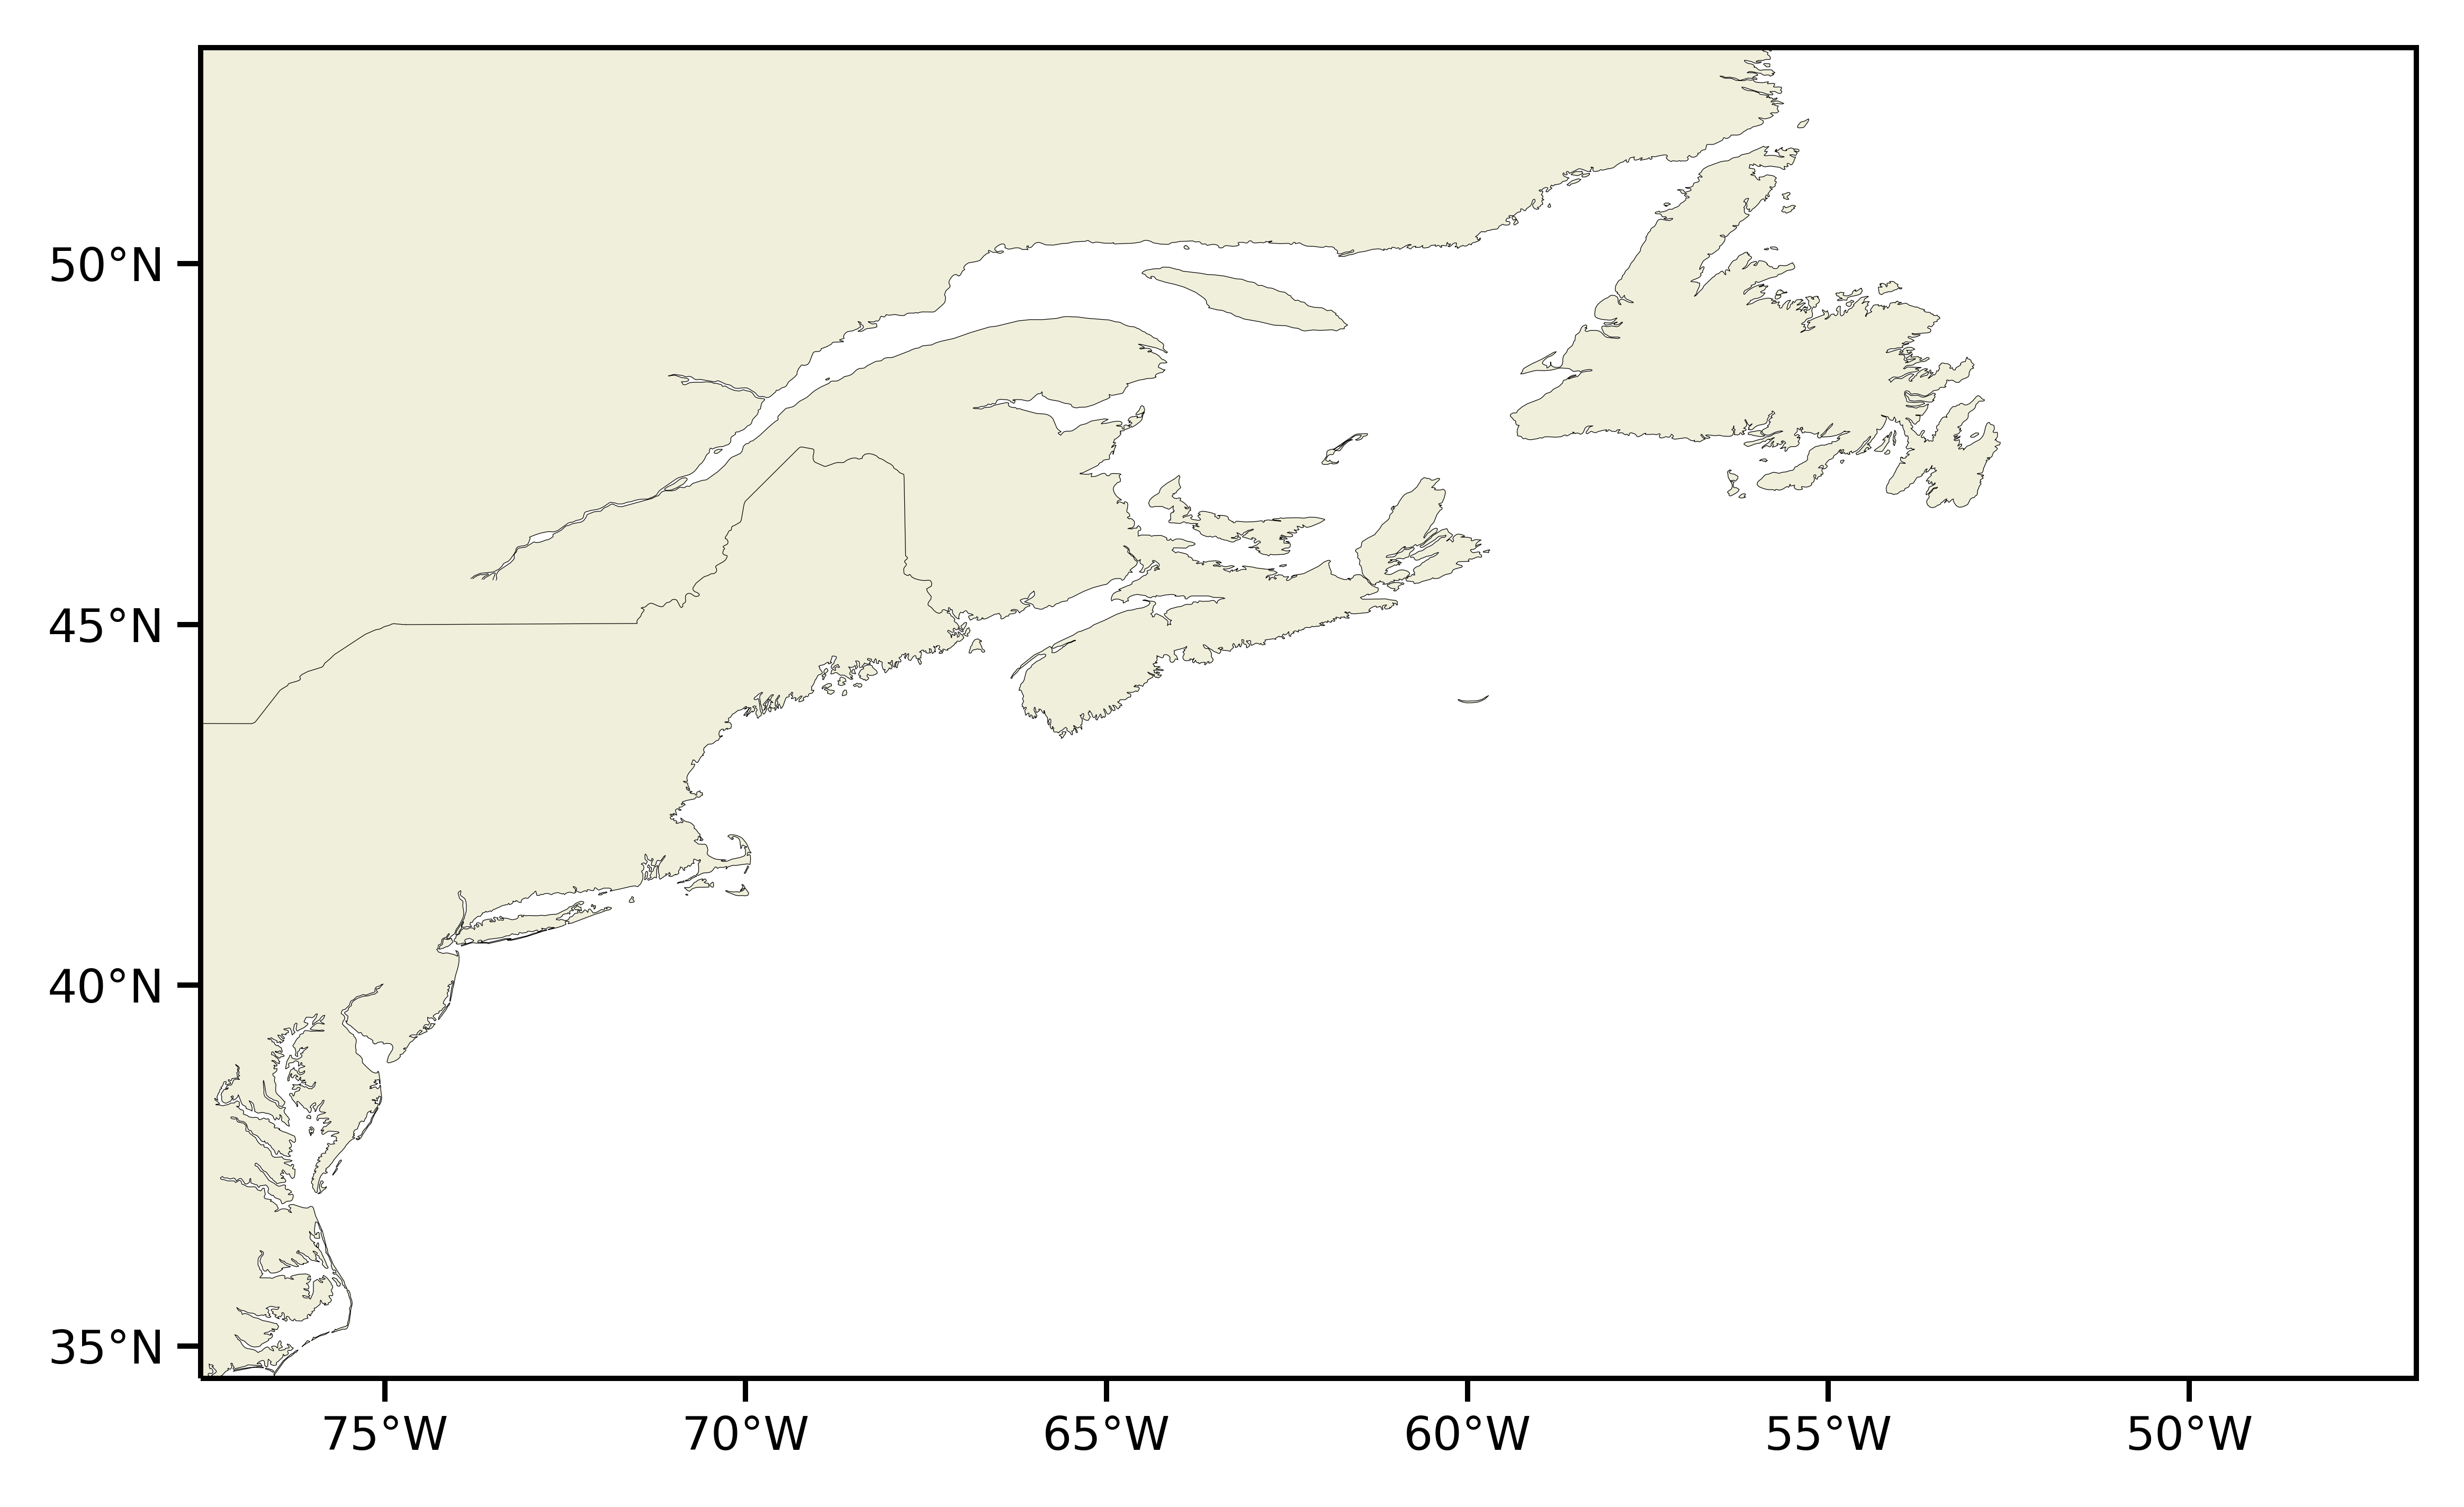

In [22]:
fig = create_figure()
ax = create_axis(fig)

# Add land features
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    edgecolor='black',
    linewidth=0.1,
    zorder=2,
    facecolor=cfeature.COLORS['land'],
)
ax.add_feature(country_borders)

# Add isobaths
isobaths = [-510, -100, -60]
contour = ax.contour(
    gaussian_filter(lons,2),
    gaussian_filter(lats, 2), 
    gaussian_filter(bathys,2),
    isobaths,
    colors='black',
    linewidths=0.7,
    linestyles='solid',
    latlon=True,
    transform=ccrs.PlateCarree()
)
